In [258]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [259]:
df=pd.read_csv('../Data/train.csv')

In [260]:
df.head()

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,0,Mystery Matters,Episode 98,NaN,True Crime,74.81,Thursday,Night,NaN,0.0,Positive,31.41998
1,1,Joke Junction,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241
2,2,Study Sessions,Episode 16,73.90,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531
3,3,Digital Digest,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.27824
4,4,Mind & Body,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031


In [261]:
df.shape

(750000, 12)

In [262]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           750000 non-null  int64  
 1   Podcast_Name                 750000 non-null  object 
 2   Episode_Title                750000 non-null  object 
 3   Episode_Length_minutes       662907 non-null  float64
 4   Genre                        750000 non-null  object 
 5   Host_Popularity_percentage   750000 non-null  float64
 6   Publication_Day              750000 non-null  object 
 7   Publication_Time             750000 non-null  object 
 8   Guest_Popularity_percentage  603970 non-null  float64
 9   Number_of_Ads                749999 non-null  float64
 10  Episode_Sentiment            750000 non-null  object 
 11  Listening_Time_minutes       750000 non-null  float64
dtypes: float64(5), int64(1), object(6)
memory usage: 68.7+ MB


In [263]:
df.isnull().sum()

id                                  0
Podcast_Name                        0
Episode_Title                       0
Episode_Length_minutes          87093
Genre                               0
Host_Popularity_percentage          0
Publication_Day                     0
Publication_Time                    0
Guest_Popularity_percentage    146030
Number_of_Ads                       1
Episode_Sentiment                   0
Listening_Time_minutes              0
dtype: int64

In [264]:
df.dropna(subset='Number_of_Ads',inplace=True)

In [265]:
df.Episode_Length_minutes.fillna(df.Episode_Length_minutes.median(),inplace=True)

In [266]:
df.Guest_Popularity_percentage.fillna(0,inplace=True)

In [267]:
df.Episode_Title.value_counts()

Episode 71    10515
Episode 62    10373
Episode 31    10292
Episode 61     9991
Episode 69     9864
              ...  
Episode 2      5134
Episode 25     5117
Episode 41     4965
Episode 37     4940
Episode 95     4838
Name: Episode_Title, Length: 100, dtype: int64

In [268]:
df.Episode_Title=df.Episode_Title.str.replace('Episode ','')

In [269]:
df.Episode_Title=pd.to_numeric(df.Episode_Title)

In [270]:
df['Had_guest']=np.where(df.Guest_Popularity_percentage==0,0,1)

In [271]:
df.Publication_Time.value_counts()

Night        196849
Evening      195777
Afternoon    179460
Morning      177913
Name: Publication_Time, dtype: int64

In [272]:
df=pd.get_dummies(df,columns=['Publication_Time'],drop_first=True)

In [273]:
df.describe()

,id,Episode_Title,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads,Listening_Time_minutes,Had_guest,Publication_Time_Evening,Publication_Time_Morning,Publication_Time_Night
count,749999.000000,749999.000000,749999.000000,749999.000000,749999.000000,749999.000000,749999.000000,749999.000000,749999.000000,749999.000000,749999.000000
mean,374999.670440,51.445835,64.427585,59.859944,42.065654,1.348855,45.437435,0.805289,0.261036,0.237218,0.262466
std,216506.589306,28.085633,30.996999,22.873082,32.858878,1.151130,27.138313,0.395978,0.439200,0.425377,0.439975
min,0.000000,1.000000,0.000000,1.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,187499.500000,28.000000,39.420000,39.410000,7.850000,0.000000,23.178350,1.000000,0.000000,0.000000,0.000000
50%,375000.000000,52.000000,63.840000,60.050000,42.200000,1.000000,43.379460,1.000000,0.000000,0.000000,0.000000
75%,562499.500000,75.000000,90.310000,79.530000,71.040000,2.000000,64.811580,1.000000,1.000000,0.000000,1.000000
max,749999.000000,100.000000,325.240000,119.460000,119.910000,103.910000,119.970000,1.000000,1.000000,1.000000,1.000000


In [274]:
df.drop(index=101637,inplace=True)

In [275]:
df.Podcast_Name.value_counts()

Tech Talks             22847
Sports Weekly          20053
Funny Folks            19635
Tech Trends            19549
Fitness First          19488
Business Insights      19480
Style Guide            19364
Game Day               19271
Melody Mix             18889
Criminal Minds         17735
Finance Focus          17628
Detective Diaries      17452
Crime Chronicles       17374
Athlete's Arena        17327
Fashion Forward        17280
Tune Time              17254
Business Briefs        17012
Lifestyle Lounge       16661
True Crime Stories     16373
Sports Central         16191
Digital Digest         16171
Humor Hub              16144
Mystery Matters        16002
Comedy Corner          15927
Joke Junction          15074
Wellness Wave          15009
Sport Spot             14778
Gadget Geek            14770
Home & Living          14685
Laugh Line             14673
Life Lessons           14464
World Watch            14043
Sound Waves            13928
Global News            13649
Mind & Body   

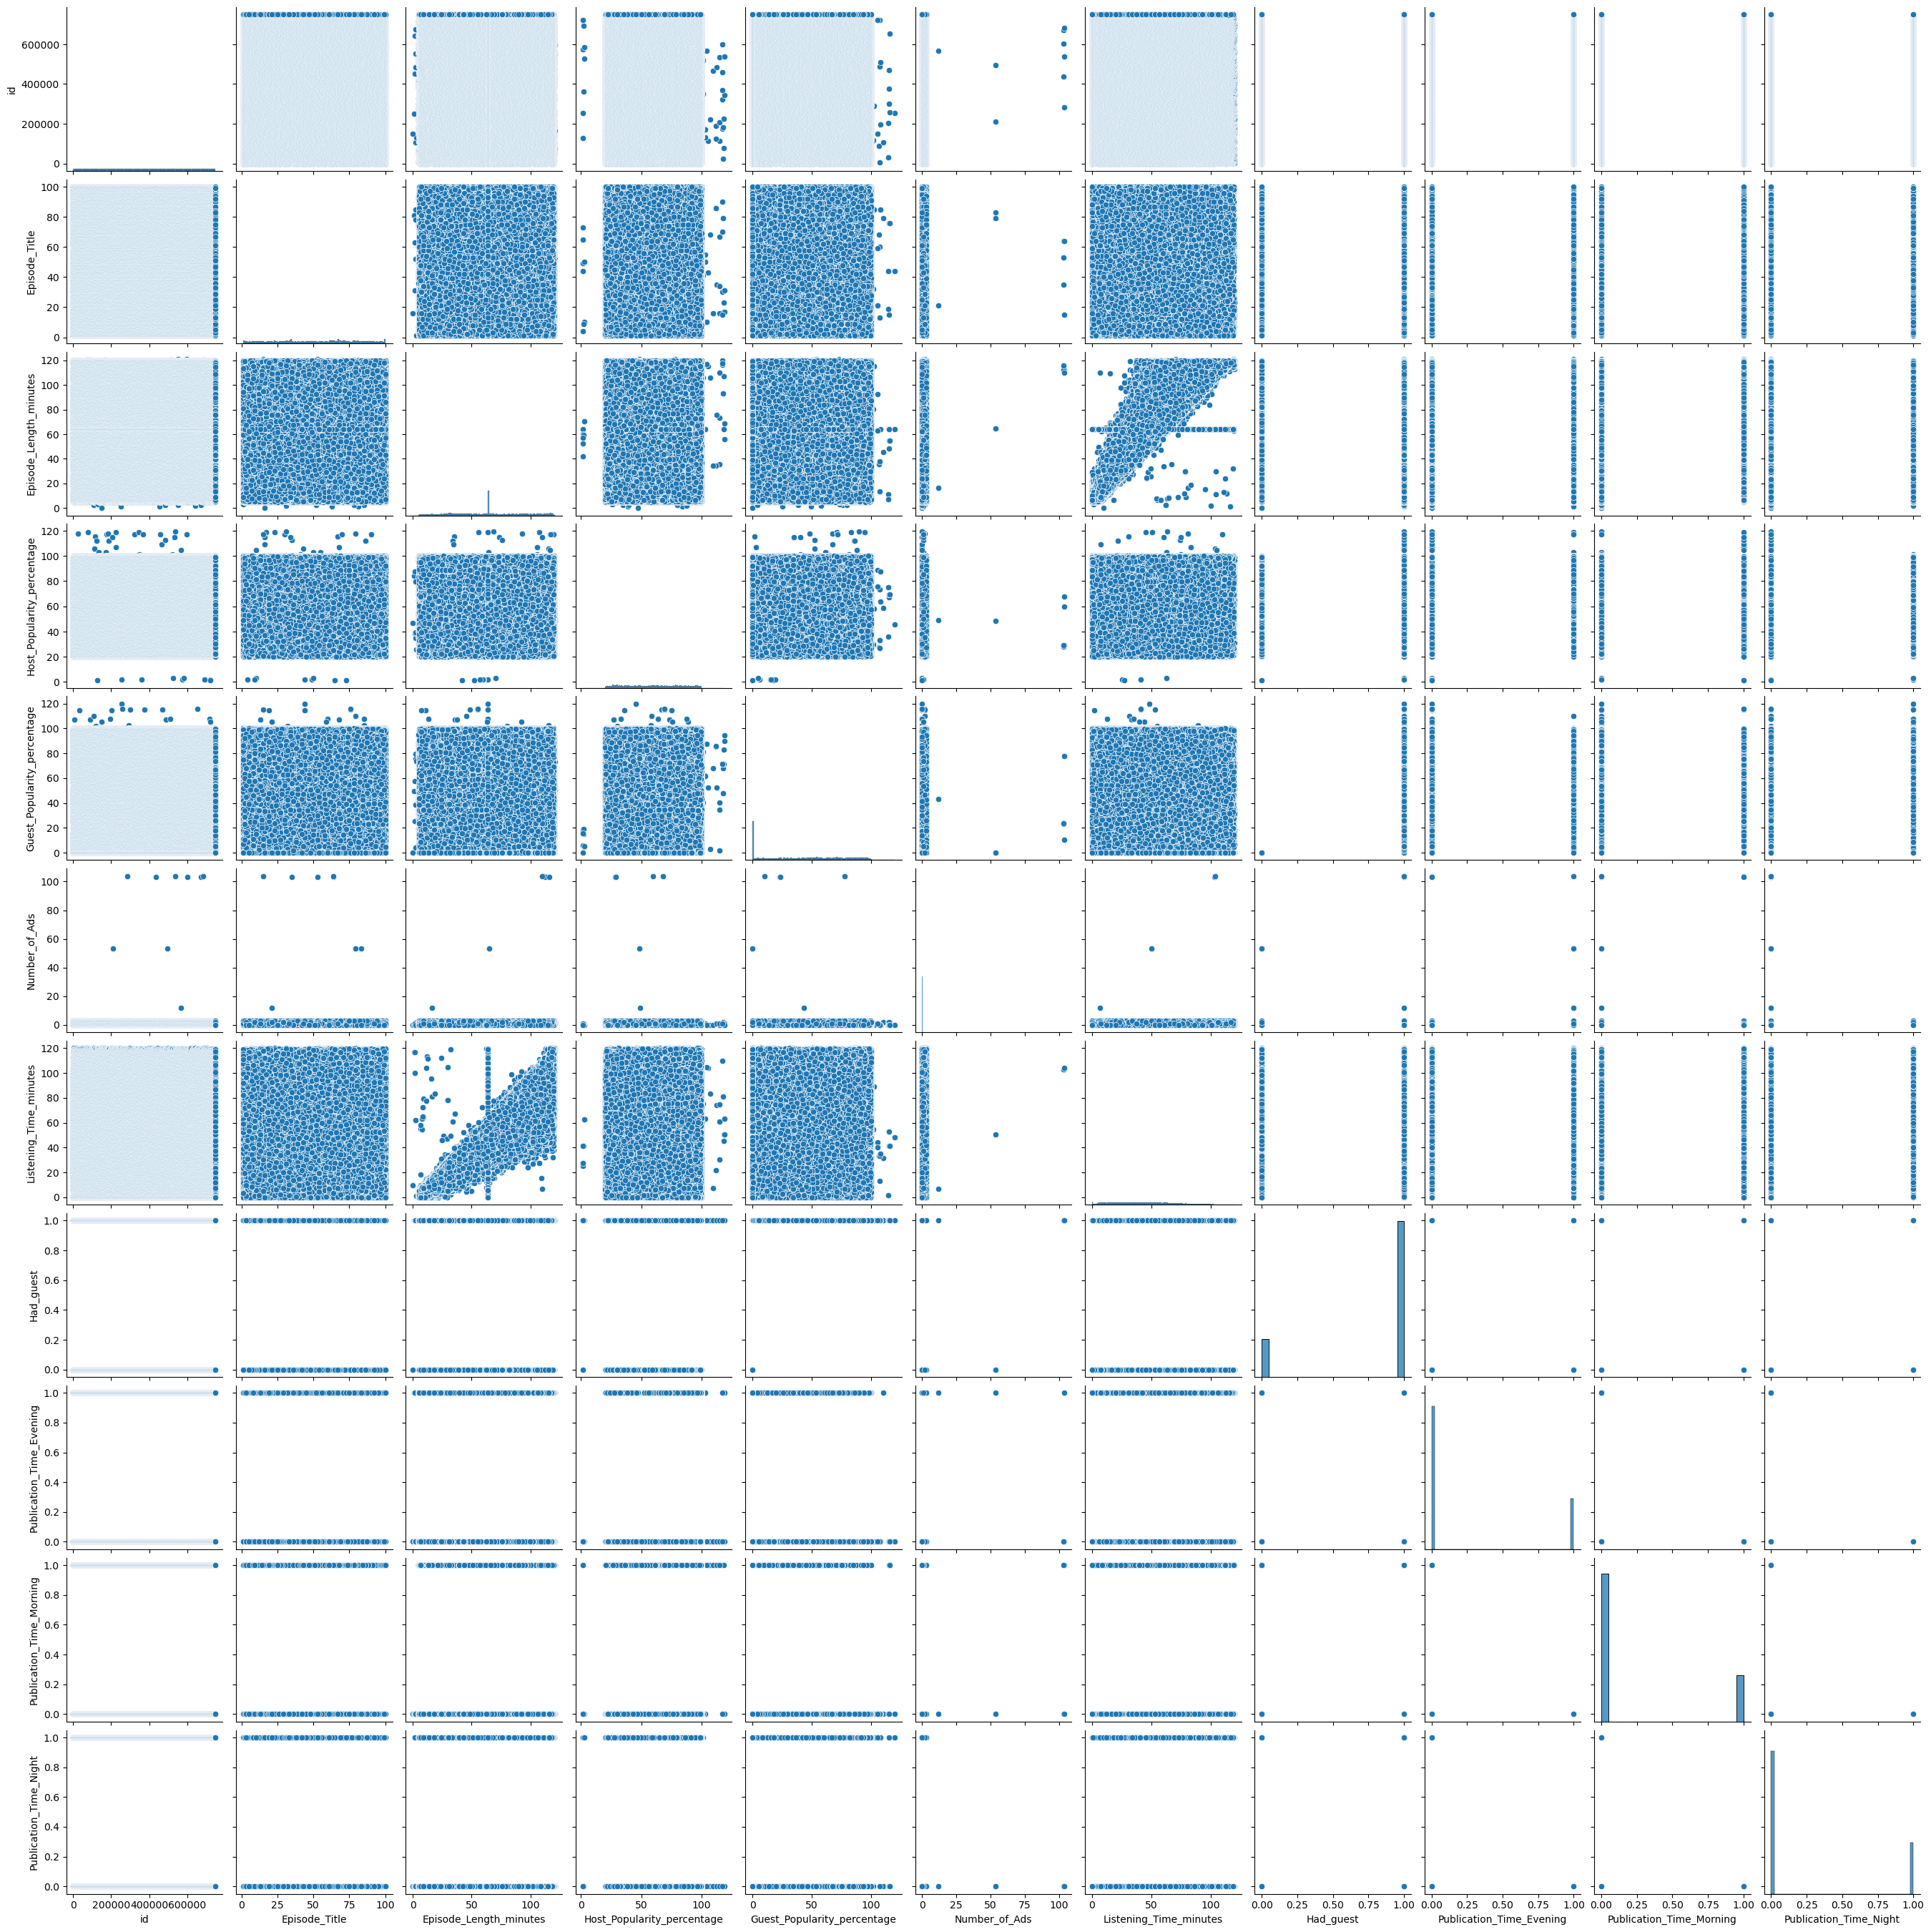

In [276]:
sns.pairplot(df)


In [277]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 749998 entries, 0 to 749999
Data columns (total 15 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           749998 non-null  int64  
 1   Podcast_Name                 749998 non-null  object 
 2   Episode_Title                749998 non-null  int64  
 3   Episode_Length_minutes       749998 non-null  float64
 4   Genre                        749998 non-null  object 
 5   Host_Popularity_percentage   749998 non-null  float64
 6   Publication_Day              749998 non-null  object 
 7   Guest_Popularity_percentage  749998 non-null  float64
 8   Number_of_Ads                749998 non-null  float64
 9   Episode_Sentiment            749998 non-null  object 
 10  Listening_Time_minutes       749998 non-null  float64
 11  Had_guest                    749998 non-null  int64  
 12  Publication_Time_Evening     749998 non-null  uint8  
 13 

In [278]:
df.Genre.value_counts()

Sports        87605
Technology    86256
True Crime    85059
Lifestyle     82460
Comedy        81453
Business      80521
Health        71416
News          63385
Music         62743
Education     49100
Name: Genre, dtype: int64

In [279]:
df = pd.get_dummies(df, columns=['Genre', 'Episode_Sentiment'], drop_first=True)
df = pd.get_dummies(df, columns=['Publication_Day'], drop_first=True)


In [280]:
df = pd.get_dummies(df, columns=['Podcast_Name'], drop_first=True)


In [281]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numeric_cols = ['Episode_Length_minutes', 'Host_Popularity_percentage', 'Guest_Popularity_percentage', 'Number_of_Ads']
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


In [282]:
df.head()

,id,Episode_Title,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads,Listening_Time_minutes,Had_guest,Publication_Time_Evening,Publication_Time_Morning,...,Podcast_Name_Sports Central,Podcast_Name_Sports Weekly,Podcast_Name_Study Sessions,Podcast_Name_Style Guide,Podcast_Name_Tech Talks,Podcast_Name_Tech Trends,Podcast_Name_True Crime Stories,Podcast_Name_Tune Time,Podcast_Name_Wellness Wave,Podcast_Name_World Watch
0,0,98,-0.018946,0.653609,-1.280193,-1.171768,31.41998,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,26,1.786475,0.309973,1.031208,0.565656,88.01241,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,16,0.305617,0.442006,-1.007207,-1.171768,44.92531,1,1,0,...,0,0,1,0,0,0,0,0,0,0
3,3,45,0.088489,-0.115418,1.114899,0.565656,46.27824,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,4,86,1.486755,0.883573,0.505626,1.434368,75.61031,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [283]:

# # For tree-based models (if you try later)
# df_tree = df.copy()
# podcast_mean = df.groupby('Podcast_Name')['Listening_Time_minutes'].mean()
# df_tree['Podcast_Name_encoded'] = df_tree['Podcast_Name'].map(podcast_mean)
# df_tree.drop('Podcast_Name', axis=1, inplace=True)


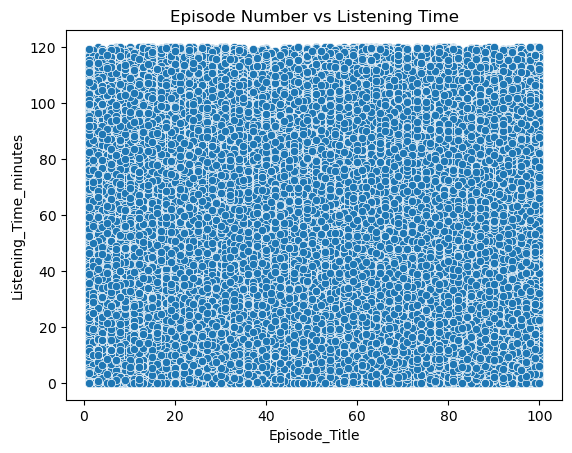

In [284]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x=df['Episode_Title'], y=df['Listening_Time_minutes'])
plt.title("Episode Number vs Listening Time")
plt.show()


In [285]:
df.drop('Episode_Title', axis=1, inplace=True)


In [286]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [287]:
df_train=df.copy()

In [288]:
X = df_train.drop('Listening_Time_minutes', axis=1)
y = df_train['Listening_Time_minutes']


In [289]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [290]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [291]:
y_pred = model.predict(X_val)
y_pred_train=model.predict(X_train)

In [292]:
mae = mean_absolute_error(y_val, y_pred)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
r2 = r2_score(y_val, y_pred)

print(f" MAE:  {mae:.2f}")
print(f" RMSE: {rmse:.2f}")
print(f" R² Score: {r2:.4f}")

 MAE:  9.76
 RMSE: 13.30
 R² Score: 0.7592


In [320]:
#Loading the test dataset
df2=pd.read_csv('../Data/test.csv')

In [321]:
df2.head()

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment
0,750000,Educational Nuggets,Episode 73,78.96,Education,38.11,Saturday,Evening,53.33,1.0,Neutral
1,750001,Sound Waves,Episode 23,27.87,Music,71.29,Sunday,Morning,NaN,0.0,Neutral
2,750002,Joke Junction,Episode 11,69.10,Comedy,67.89,Friday,Evening,97.51,0.0,Positive
3,750003,Comedy Corner,Episode 73,115.39,Comedy,23.40,Sunday,Morning,51.75,2.0,Positive
4,750004,Life Lessons,Episode 50,72.32,Lifestyle,58.10,Wednesday,Morning,11.30,2.0,Neutral


In [322]:
df2.shape

(250000, 11)

In [323]:
df2.isnull().sum()

id                                 0
Podcast_Name                       0
Episode_Title                      0
Episode_Length_minutes         28736
Genre                              0
Host_Popularity_percentage         0
Publication_Day                    0
Publication_Time                   0
Guest_Popularity_percentage    48832
Number_of_Ads                      0
Episode_Sentiment                  0
dtype: int64

In [324]:
df2.Episode_Length_minutes.fillna(df.Episode_Length_minutes.median(),inplace=True)

In [325]:
df2.Guest_Popularity_percentage.fillna(0,inplace=True)

In [326]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 11 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           250000 non-null  int64  
 1   Podcast_Name                 250000 non-null  object 
 2   Episode_Title                250000 non-null  object 
 3   Episode_Length_minutes       250000 non-null  float64
 4   Genre                        250000 non-null  object 
 5   Host_Popularity_percentage   250000 non-null  float64
 6   Publication_Day              250000 non-null  object 
 7   Publication_Time             250000 non-null  object 
 8   Guest_Popularity_percentage  250000 non-null  float64
 9   Number_of_Ads                250000 non-null  float64
 10  Episode_Sentiment            250000 non-null  object 
dtypes: float64(4), int64(1), object(6)
memory usage: 21.0+ MB


In [327]:
df2.drop(columns='Episode_Title',axis=1,inplace=True)

In [328]:
df2['Had_guest']=np.where(df2.Guest_Popularity_percentage==0,0,1)

In [329]:
df2=pd.get_dummies(df2,columns=['Publication_Time'],drop_first=True)

In [334]:
df2.describe()

,id,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads,Had_guest,Publication_Time_Evening,Publication_Time_Morning,Publication_Time_Night
count,250000.000000,2.500000e+05,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,874999.500000,3.711007e+02,59.716491,41.998082,1.347244,0.804660,0.260988,0.238192,0.261760
std,72168.927986,1.569724e+05,22.880028,32.851723,1.112672,0.396463,0.439174,0.425978,0.439594
min,750000.000000,-1.894585e-02,2.490000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,812499.750000,2.654000e+01,39.250000,7.790000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,874999.500000,5.671000e+01,59.900000,42.090000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,937499.250000,9.051000e+01,79.390000,70.990000,2.000000,1.000000,1.000000,0.000000,1.000000
max,999999.000000,7.848626e+07,117.760000,116.820000,3.000000,1.000000,1.000000,1.000000,1.000000


In [333]:
df2[df2.Number_of_Ads>10]

,id,Podcast_Name,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Had_guest,Publication_Time_Evening,Publication_Time_Morning,Publication_Time_Night


In [332]:
df2.Number_of_Ads= np.where(df2.Number_of_Ads>10,df2.Number_of_Ads.mode(),df2.Number_of_Ads)

In [335]:
df2 = pd.get_dummies(df2, columns=['Genre', 'Episode_Sentiment'], drop_first=True)
df2 = pd.get_dummies(df2, columns=['Publication_Day'], drop_first=True)
df2 = pd.get_dummies(df2, columns=['Podcast_Name'], drop_first=True)


In [336]:
df2.shape

(250000, 73)

In [337]:
df2.shape

(250000, 73)

In [338]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numeric_cols = ['Episode_Length_minutes', 'Host_Popularity_percentage', 'Guest_Popularity_percentage', 'Number_of_Ads']
df2[numeric_cols] = scaler.fit_transform(df2[numeric_cols])

In [339]:
# Align df2 columns with X_train (used in model training)
df2_aligned = df2.reindex(columns=X_train.columns, fill_value=0)

# Predict
df2['Predicted_Listening_Time'] = model.predict(df2_aligned)

# Preview the predictions
df2[['Predicted_Listening_Time']].head()


,Predicted_Listening_Time
0,44.611906
1,47.135598
2,47.462218
3,43.142950
4,43.867427


In [340]:
df2.to_csv('predicted_listening_times.csv', index=False)



In [341]:
df3=pd.read_csv('predicted_listening_times.csv')

In [342]:
df3.shape

(250000, 74)

In [343]:
# Make sure your submission file has exactly two columns: id and prediction
submission = df2[['id', 'Predicted_Listening_Time']].copy()

# Rename prediction column to match competition requirements (check Kaggle example!)
submission.columns = ['id', 'Listening_Time_minutes']  # or whatever the sample submission uses

# Check shape just to be safe
print(submission.shape)  # should be (250000, 2)

# Save to CSV (with header, no index)
submission.to_csv('submission.csv', index=False)


(250000, 2)
